## Dépendance logicielle

Ce notebook dépend des bibliothèques suivantes :
- Python3: pandas, numpy, scipy, matplotlib, time

In [4]:
import numpy as np
import scipy.spatial.distance as dist
import matplotlib.pyplot as plt
import time
import pandas as pd

In [5]:
import IPython
print(IPython.sys_info())
np.__version__

{'commit_hash': 'b467d487e',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/usr/lib/python3/dist-packages/IPython',
 'ipython_version': '5.5.0',
 'os_name': 'posix',
 'platform': 'Linux-4.2.0-1-amd64-x86_64-with-debian-stretch-sid',
 'sys_executable': '/usr/bin/python3',
 'sys_platform': 'linux',
 'sys_version': '3.6.3 (default, Oct  3 2017, 21:16:13) \n[GCC 7.2.0]'}


'1.13.1'

# Partie A: Données synthétiques

## Question 1

In [3]:
N=1000
M=100

def ratios(D):
    t0 = time.clock() # process time is different then wall time
    x = np.random.randn(N,D) # data
    y = np.random.randn(M,D) # requests
    z = dist.cdist(y,x,'euclidean') # euclidean distance 
    minimums=z.min(1)
    maximums=z.max(1)
    time_taken = time.clock() - t0
    return pd.DataFrame({'Ratios' : (minimums/maximums).tolist(), 'Elapsed' : time_taken, 'N' : N, 'D' : D})

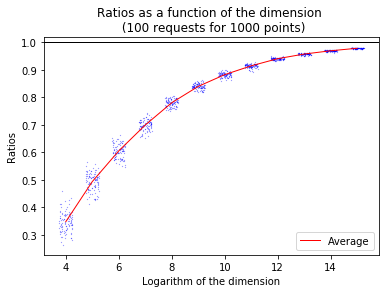

In [4]:
exp_end = 15
results = []
means = []
times = []

for i in range(4, exp_end+1):
    D = 2 ** i
    x = (np.random.rand(M) - 0.5) * .5 + i 
    sample = ratios(D)
    y = (sample['Ratios'].values)
    plt.plot(x, y, 'b.', markersize = .3)
    means.append(np.mean(y))
    times.append(sample['Elapsed'][0])

avg, = plt.plot(np.arange(4, exp_end+1), means, linewidth= 1, color = 'red')
plt.axhline(y=1, color='black', linestyle='-', linewidth = 1)

plt.title("Ratios as a function of the dimension \n (" + str(M) + " requests for " + str(N) + " points)")
plt.xlabel("Logarithm of the dimension")
plt.ylabel("Ratios")
plt.legend([avg], ["Average"])
plt.show()

Nous conjecturons que le ratio moyen tend vers 1 à N et M fixé quand la dimension augmente. C'est la "malédiction de la dimensionalité".

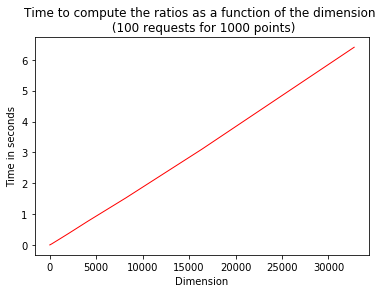

In [5]:
plt.plot([2**i for i in range(4, exp_end +1)], times, linewidth= 1, color = 'red')
plt.title("Time to compute the ratios as a function of the dimension \n (" + str(M) + " requests for " + str(N) + " points)")
plt.xlabel("Dimension")
plt.ylabel("Time in seconds")
plt.show()

La compléxité semble bien linéaire en la dimension.

Même calculs avec N plus grand.

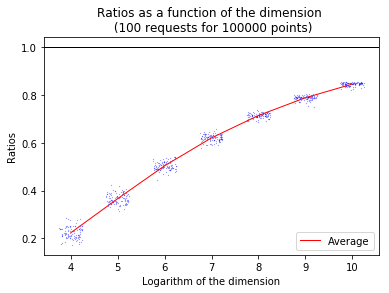

In [6]:
N = 10**5
exp_end = 10
results = []
means = []
times = []

for i in range(4, exp_end+1):
    D = 2 ** i
    x = (np.random.rand(M) - 0.5) * .5 + i 
    sample = ratios(D)
    y = (sample['Ratios'].values)
    plt.plot(x, y, 'b.', markersize = .3)
    means.append(np.mean(y))
    times.append(sample['Elapsed'][0])

avg, = plt.plot(np.arange(4, exp_end+1), means, linewidth= 1, color = 'red')
plt.axhline(y=1, color='black', linestyle='-', linewidth = 1)

plt.title("Ratios as a function of the dimension \n (" + str(M) + " requests for " + str(N) + " points)")
plt.xlabel("Logarithm of the dimension")
plt.ylabel("Ratios")
plt.legend([avg], ["Average"])
plt.show()

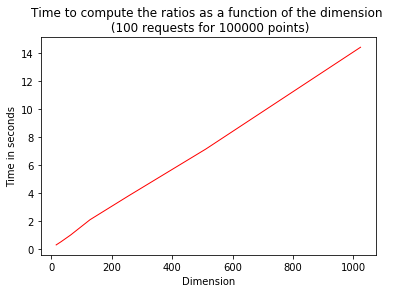

In [7]:
plt.plot([2**i for i in range(4, exp_end +1)], times, linewidth= 1, color = 'red')
plt.title("Time to compute the ratios as a function of the dimension \n (" + str(M) + " requests for " + str(N) + " points)")
plt.xlabel("Dimension")
plt.ylabel("Time in seconds")
plt.show()

## Question 2

In [6]:
N = 1000
M = 100
D = 32

In [7]:
def random_norm_pos(n, dim):
    mean = [0]*dim
    cov = [[0]*dim for i in range(dim)]
    for i in range(dim):
        cov[i][i] = 1
    x = np.random.multivariate_normal(mean, cov, n)
    normed_x = x / np.linalg.norm(x, axis=-1)[:, np.newaxis]
    positiv_x = list(map(np.absolute, normed_x))
    return positiv_x

In [8]:
points = random_norm_pos(N,D)
requests = random_norm_pos(M, D)

## Question 3 

In [9]:
def ratios_hypersphere_pos(D):
    t0 = time.clock() # process time is different then wall time
    x = random_norm_pos(N,D) # data
    y = random_norm_pos(M,D) # requests
    z = dist.cdist(y,x,'euclidean') # euclidean distance 
    minimums=z.min(1)
    maximums=z.max(1)
    time_taken = time.clock() - t0
    return pd.DataFrame({'Ratios' : (minimums/maximums).tolist(), 'Elapsed' : time_taken, 'N' : N, 'D' : D})

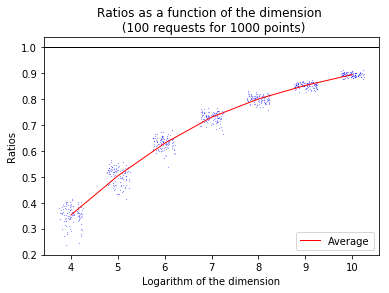

In [12]:
exp_end = 10
results = []
means = []
times = []

for i in range(4, exp_end+1):
    D = 2 ** i
    x = (np.random.rand(M) - 0.5) * .5 + i 
    sample = ratios_hypersphere_pos(D)
    y = (sample['Ratios'].values)
    plt.plot(x, y, 'b.', markersize = .3)
    means.append(np.mean(y))
    times.append(sample['Elapsed'][0])

avg, = plt.plot(np.arange(4, exp_end+1), means, linewidth= 1, color = 'red')
plt.axhline(y=1, color='black', linestyle='-', linewidth = 1)

plt.title("Ratios as a function of the dimension \n (" + str(M) + " requests for " + str(N) + " points)")
plt.xlabel("Logarithm of the dimension")
plt.ylabel("Ratios")
plt.legend([avg], ["Average"])
plt.show()

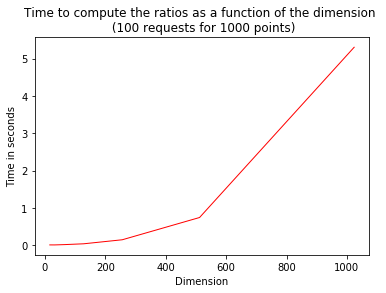

In [14]:
plt.plot([2**i for i in range(4, exp_end +1)], times, linewidth= 1, color = 'red')
plt.title("Time to compute the ratios as a function of the dimension \n (" + str(M) + " requests for " + str(N) + " points)")
plt.xlabel("Dimension")
plt.ylabel("Time in seconds")
plt.show()

La complexité n'est plus linéaire, en effet, lors de la création des vecteurs, nous créons une matrice de covariance, la complexité devient donc quadratique.

## Question 4 

### Hub 

Nous pouvons supposer que le vecteur de dimension D dont toutes les composantes sont égales est un hub. 

Cette hypothèse vient du raisonnement suivant:

notons SHP le cadran positif de l'hypersphère unité de dimension D,

soit v l'unique vecteur de SHP sont toutes les composantes sont égales.

v minimise max{|v-x| | x appartient à SHP}.

### Anti-Hub 

Nous pouvons supposer que les vecteurs de la base canonique sont des anti-hub.

Cette hypothèse vient du fait qu'ils maximise max{|e-x| | x appartient à SHP}.

## Question 5

In [23]:
N = 1000
M = 100
D = 8192

hub = np.ones(D)
hub = hub / np.linalg.norm(hub, axis=-1)
anti_hub = np.zeros(D)
anti_hub[0] = 1

In [ ]:
def ratios_hypersphere_pos_hub(D):
    t0 = time.clock() # process time is different then wall time
    x = random_norm_pos(N,D) # data
    y = random_norm_pos(M,D) # requests
    z = dist.cdist(y,x,'euclidean') # euclidean distance 
    minimums=z.min(1)
    maximums=z.max(1)
    time_taken = time.clock() - t0
    return pd.DataFrame({'Ratios' : (minimums/maximums).tolist(), 'Elapsed' : time_taken, 'N' : N, 'D' : D})

In [ ]:
exp_end = 10
results = []
means = []
times = []

for i in range(4, exp_end+1):
    D = 2 ** i
    x = (np.random.rand(M) - 0.5) * .5 + i 
    sample = ratios_hypersphere_pos(D)
    y = (sample['Ratios'].values)
    plt.plot(x, y, 'b.', markersize = .3)
    means.append(np.mean(y))
    times.append(sample['Elapsed'][0])

avg, = plt.plot(np.arange(4, exp_end+1), means, linewidth= 1, color = 'red')
plt.axhline(y=1, color='black', linestyle='-', linewidth = 1)

plt.title("Ratios as a function of the dimension \n (" + str(M) + " requests for " + str(N) + " points)")
plt.xlabel("Logarithm of the dimension")
plt.ylabel("Ratios")
plt.legend([avg], ["Average"])
plt.show()